# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of whether or not someone has heart disease based on their medical attributes. 

we are going to take the following approach : 
1. Problem  defination
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Defination 

In a statement , 
> Given clinical parameters about a patient, can we  predict whether or not they have heart disease?

## 2. Data 
The original data came from the cleavland data from the UCL Machine Learning Repository. 

## 3. Evaluation 
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept , we'll pursue the project.

## 4. Features 
**This is where you will get different information about each of the features in your data.**
* id(Unique id for each patient)
* 
ag (Ag o th patien i years
* 
orign (plae f styd
* )
ex (Male/Femal* e)
cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomati* c])
trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospit* al))
chol (serum cholesterol in m* g/d)
fbs (if fasting blood sugar > 120 * mg/dl)
restecg (resting electrocardiographic r* esults)
-- Values: [normal, stt abnormality, lv hype* rtrophy]
thalach: maximum heart rate*  achieved
exang: exercise-induced angina (Tr* ue/ False)
oldpeak: ST depression induced by exercise relat* ive to rest
slope: the slope of the peak exercis* e ST segment
ca: number of major vessels (0-3) colored b* y fluoroscopy
thal: [normal; fixed defect; reve* rsible defect]
num: the predicted attribute

## Preparing the tools 
We're going to use pandas , Matplotlib and Numpy for data analysis and manipulation


In [132]:
# Import all the tools we need 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline 

# Models from scikit learn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay


## Load data 

In [5]:
df = pd.read_csv('heart-disease.csv')
df.shape 

(303, 14)

## Data Exploration (exploratory data anlysis or EDA )
The goal here is to find out more about data and become a subject matter on the dataset you're working with. 

1. What questions are you trying to solve?
2. what kind of data do we have and how do we treat differnet types?
3. What' missing from the data and how do you deal with it ?
4. Where are the outliers and why should you care about them?
5. How can you add ,change or remove features to get more out of your data? 

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [10]:
# How many of each class there 
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

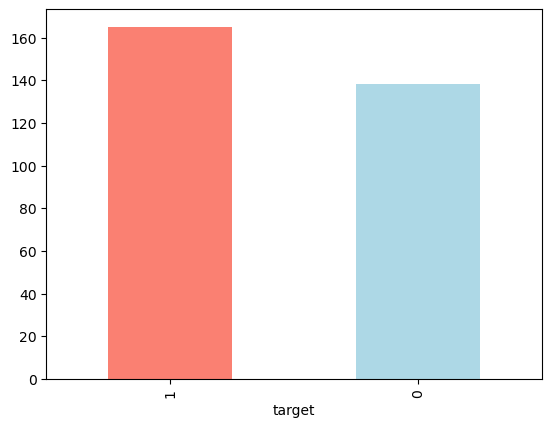

In [12]:
df['target'].value_counts().plot(kind='bar',color=['salmon','lightblue'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [15]:
# Are there any missing values? 
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [16]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency according to sex 

In [17]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [18]:
# Compare target column with sex column 
pd.crosstab(df.target,df.sex)


sex,0,1
target,,
0,24,114
1,72,93


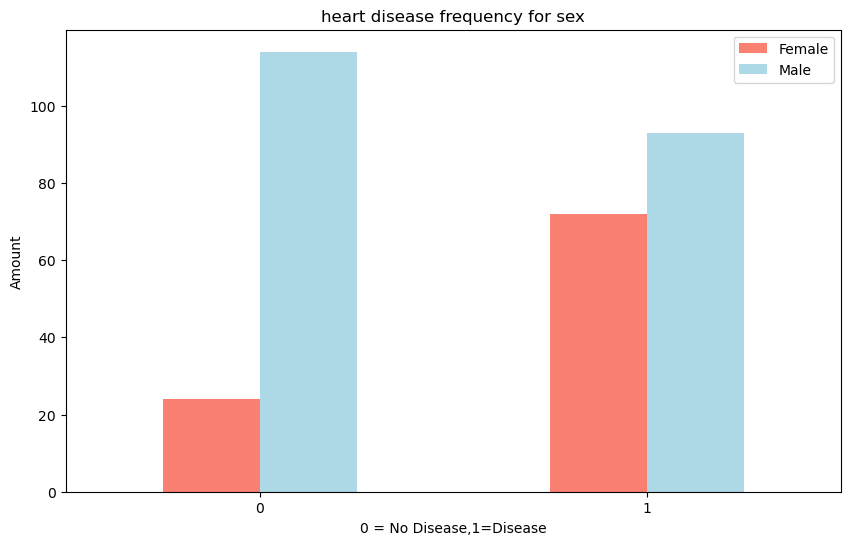

In [21]:
 # Create a  plot of crosstab 
pd.crosstab(df.target,df.sex).plot(kind ='bar',figsize = (10,6),color = ['salmon','lightblue'])
plt.title('heart disease frequency for sex')
plt.xlabel('0 = No Disease,1=Disease')
plt.ylabel('Amount')
plt.legend(['Female','Male']);
plt.xticks(rotation = 0);

In [22]:
df .head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
df['thalach'].value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

## Age vs Max Heart rate for heart disease

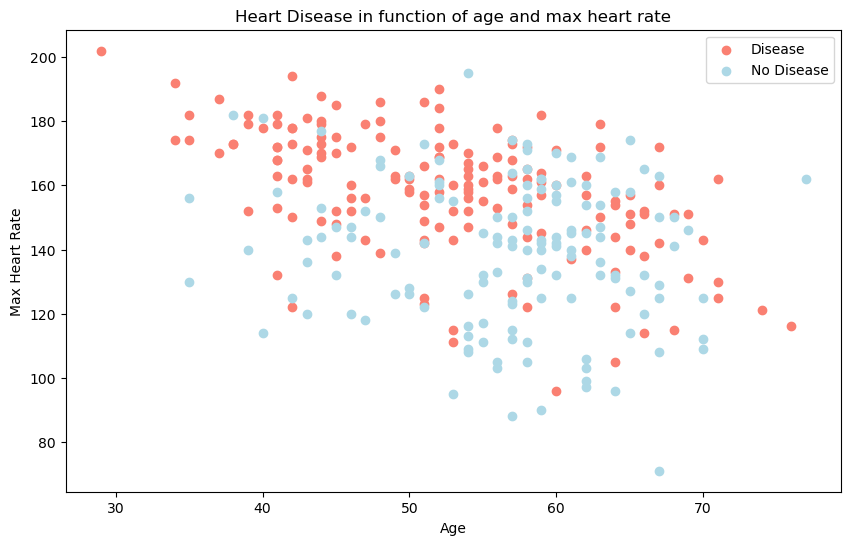

In [33]:
# Create another figure 
plt.figure(figsize=(10,6))

#Scatter with positive examples 
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c='salmon');

# Scatter with negative examples 
plt.scatter (df.age[df.target==0],df.thalach[df.target==0],c='lightblue');

# Add some helful info 
plt.title('Heart Disease in function of age and max heart rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease','No Disease']);

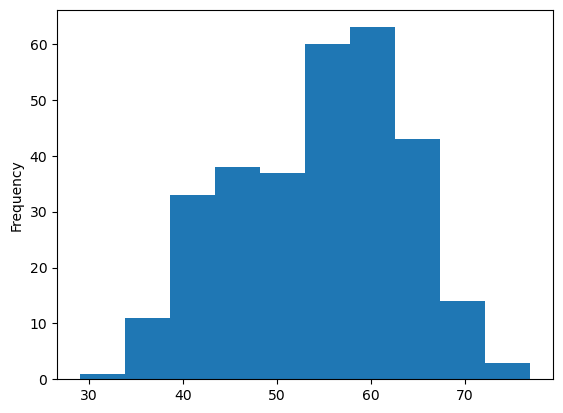

In [34]:
# Check the distribution of the age column with a histogram 
df.age.plot.hist();

## Heart disease frequency per chest pain type

In [36]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


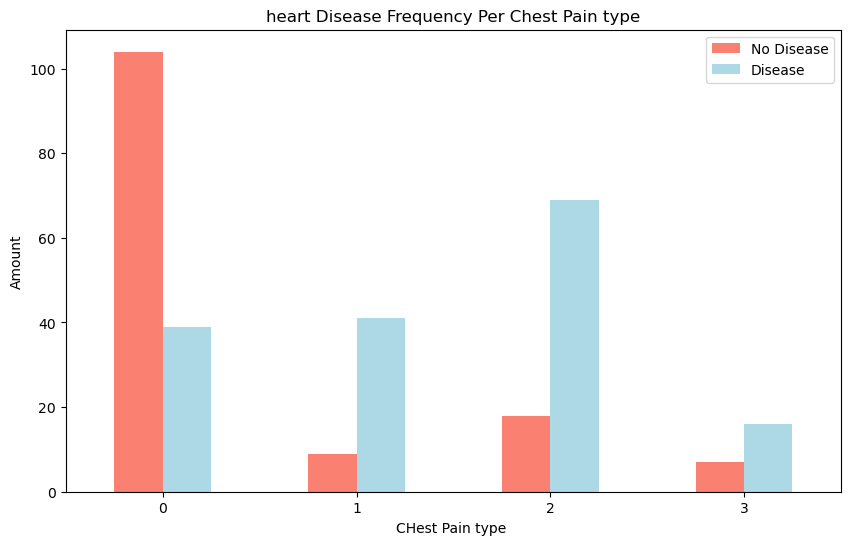

In [41]:
# Make the crosstab more visual 
pd.crosstab(df.cp,df.target).plot(kind='bar',figsize=(10,6),color=['salmon','lightblue'])

# Add some communication
plt.title('heart Disease Frequency Per Chest Pain type')
plt.xlabel('CHest Pain type ')
plt.ylabel('Amount')
plt.legend(['No Disease','Disease'])
plt.xticks(rotation=0);

In [42]:
# Make a correlation matrix 
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


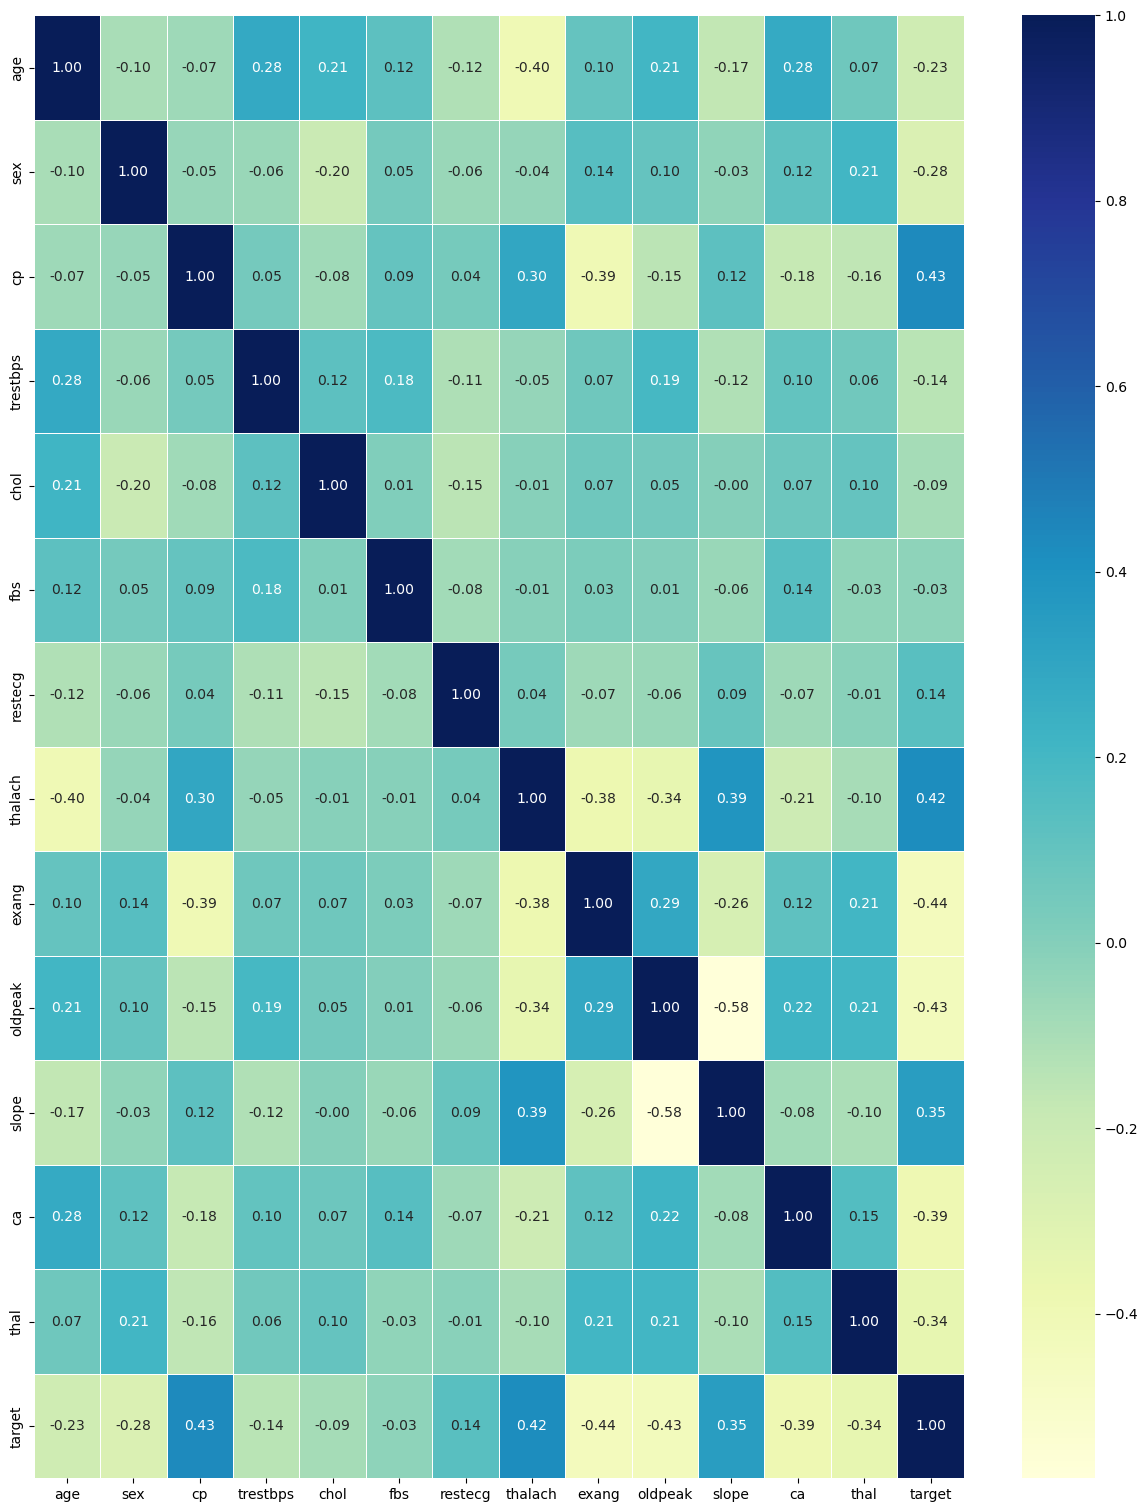

In [44]:
# Let's make our correlation matrix prettier
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,19))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt='.2f', cmap='YlGnBu');

## 5. Modelling 

In [45]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [46]:
# Split data into X & y 

X = df.drop('target',axis=1)
y = df['target']


In [47]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [48]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [55]:
# Split data into train and test sets 
np.random.seed(42)

# Split into train and test set 
X_train , X_test , y_train, y_test = train_test_split(X,y,test_size=0.2)

In [56]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

* Now we've got data split into training and test sets, its time to build a machine learning model. 

* We'll train it (find the patterns) on the training set.

* And we'll test it (use the patterns) on the test set.

* We're going to try 3 different machine learning models :
1. Logistic regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [111]:
# Put models in a dictionary 
models = {'logistic Regression':LogisticRegression(),
         'KNN':KNeighborsClassifier(),
         'Random Forest':RandomForestClassifier(n_estimators=100)} 
# create a function to fit and score models 
def fit_and_score(models, X_train,X_test,y_train,y_test):
    '''
    Fits and evaluates given machine learning models.
    models : a dict of different scikit-learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels    
    '''
    # Set random seed 
    np.random.seed(42)
    # Make a list to keep model scores 
    model_scores = {}
    # Loop through models
    for name,model in models.items():
        # Fit the model to data 
        model.fit(X_train,y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

model_scores = fit_and_score(models,X_train,X_test,y_train,y_test)
model_scores

D:\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model Comparison

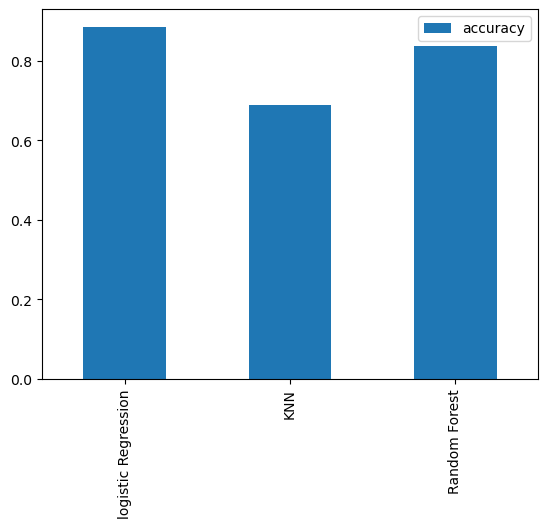

In [64]:
model_compare = pd.DataFrame(model_scores,index=['accuracy'])
model_compare.T.plot.bar();


Now we've got a baseline model ... and we know the model's first predictions aren't always what we should based our next steps off. 
What should do ? 

Let's look at the following :
* Hyperparameter tunning
* Feature importance
* Confusion matrix
* Cross Validation
* Precision
* Recall
* F1 score
* Classification Report
* ROC Curve
* Are Under Curve (AUC)

## Hyperparameter Tuning

In [67]:
# Let's tune KNN 
train_score = []
test_score = []

# Create a list of different values for n_neighbours 
neighbors = range(1,21)

# Setup KNN instance 
knn = KNeighborsClassifier()

# Loop through different n_neighbours
for i in neighbors : 
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm 
    knn.fit(X_train,y_train)
    
    # Update the training scores list 
    train_score.append(knn.score(X_train,y_train))

    # Update the test scores list 
    test_score.append(knn.score(X_test,y_test))
    

In [71]:
train_score,test_score

([1.0,
  0.8099173553719008,
  0.7727272727272727,
  0.743801652892562,
  0.7603305785123967,
  0.7520661157024794,
  0.743801652892562,
  0.7231404958677686,
  0.71900826446281,
  0.6942148760330579,
  0.7272727272727273,
  0.6983471074380165,
  0.6900826446280992,
  0.6942148760330579,
  0.6859504132231405,
  0.6735537190082644,
  0.6859504132231405,
  0.6652892561983471,
  0.6818181818181818,
  0.6694214876033058],
 [0.6229508196721312,
  0.639344262295082,
  0.6557377049180327,
  0.6721311475409836,
  0.6885245901639344,
  0.7213114754098361,
  0.7049180327868853,
  0.6885245901639344,
  0.6885245901639344,
  0.7049180327868853,
  0.7540983606557377,
  0.7377049180327869,
  0.7377049180327869,
  0.7377049180327869,
  0.6885245901639344,
  0.7213114754098361,
  0.6885245901639344,
  0.6885245901639344,
  0.7049180327868853,
  0.6557377049180327])

maximum Knn socre on the test data :75.41%


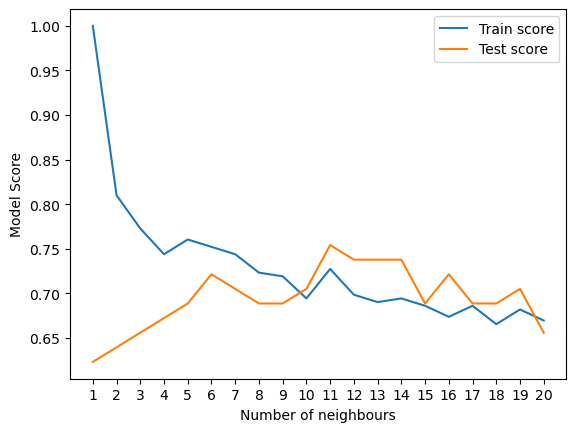

In [74]:
plt.plot(neighbors,train_score,label='Train score')
plt.plot(neighbors,test_score,label='Test score')
plt.xticks(np.arange(1,21,1))
plt.xlabel('Number of neighbours')
plt.ylabel('Model Score')
plt.legend()

print(f'maximum Knn socre on the test data :{max(test_score)*100:.2f}%')


## Tunning Hyperparameters of RandomForest and LogisticRegression using RandomizedSearchCV


In [91]:
np.random.seed(42)
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Import RandomizedSearchCV from sklearn's model_selection module
from sklearn.model_selection import RandomizedSearchCV


# Setup an instance of RandomizedSearchCV with a LogisticRegression() estimator,
# our log_reg_grid as the param_distributions, a cv of 5 and n_iter of 5.
rs_clf = RandomizedSearchCV(estimator=LogisticRegression(),
                           param_distributions = log_reg_grid,
                           n_iter = 10,
                           cv = 5,
                           verbose = 5)

# Fit the instance of RandomizedSearchCV
rs_clf.fit(X_train,y_train)
    
rs_clf.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ........C=0.0001, solver=liblinear;, score=0.653 total time=   0.0s
[CV 2/5] END ........C=0.0001, solver=liblinear;, score=0.633 total time=   0.0s
[CV 3/5] END ........C=0.0001, solver=liblinear;, score=0.625 total time=   0.0s
[CV 4/5] END ........C=0.0001, solver=liblinear;, score=0.604 total time=   0.0s
[CV 5/5] END ........C=0.0001, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/5] END C=1438.44988828766, solver=liblinear;, score=0.776 total time=   0.0s
[CV 2/5] END C=1438.44988828766, solver=liblinear;, score=0.918 total time=   0.0s
[CV 3/5] END C=1438.44988828766, solver=liblinear;, score=0.771 total time=   0.0s
[CV 4/5] END C=1438.44988828766, solver=liblinear;, score=0.833 total time=   0.0s
[CV 5/5] END C=1438.44988828766, solver=liblinear;, score=0.792 total time=   0.0s
[CV 1/5] END C=206.913808111479, solver=liblinear;, score=0.776 total time=   0.0s
[CV 2/5] END C=206.913808111479, sol

{'solver': 'liblinear', 'C': 0.23357214690901212}

## Hyperparameter tunning with RandomizedSearchCV 

We're going to tune :
* LogisticRegression()
* RandomForestClassifier()

... using RandomizedSearchCV
  

In [104]:
# create a hyperparameter grid for LogisticRegression 
log_reg_grid = {
    'C': np.logspace(-4,4,20),
    'solver' : ['liblinear']
} 

# Create a hyperparmeter grid fro RandomForestClassifier
rf_grid = {'n_estimators' : np.arange(10,1000,50),
          'max_depth' : [None,3,5,10],
          'min_samples_split' : np.arange(2,20,2),
          'min_samples_leaf':np.arange(1,20,2)}


Now we've got hyperparameter grids setup for each of our models , let's tune them using RandomizedSearchCV...

In [97]:
# Tune LogisticRegression 

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression 
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = log_reg_grid,
                               cv = 5,
                               n_iter = 20,
                               verbose = True)

# Fir random hyperparameter search model for logisticRegression 
rs_log_reg.fit(X_train,y_train)
rs_log_reg.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'solver': 'liblinear', 'C': 0.23357214690901212}

In [98]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

Now we've tune LogisticRegression(), let's do same for RandomForestClassifier()...

In [107]:
# Tune RandomForestClassifier
np.random.seed(42)

# Setup random hyperparemeter search for LogisticRegression 
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                       param_distributions = rf_grid,
                       cv =5 ,
                       n_iter = 20,
                       verbose = True
                      )

# Fit Random hyperparameter search model for logisticRegression 
rs_rf.fit(X_train,y_train)
rs_rf.best_params_
rs_rf.score(X_test,y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8688524590163934

In [112]:
model_scores

{'logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

# Hyperparameters Tuning with GRidSearchCV 
Since our LogisticRegression model provides the best scores so far, we'll try and improve the m again using GridSearchCV ...

In [124]:
# Different hyperparmeters for our logisticregression model 
log_reg_grid ={
    'C': np.logspace(-4,4,30),
    'solver': ['liblinear']
}

# Setup grid hyperparameter search for LogisticRegression 

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg_grid,
                          cv = 5,
                          verbose =True
                         )

# Fit grid hyperparameter search model 
gs_log_reg.fit(X_train,y_train);
gs_log_reg.best_params_
gs_log_reg.score(X_test,y_test)
y_preds = gs_log_reg.predict(X_test)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


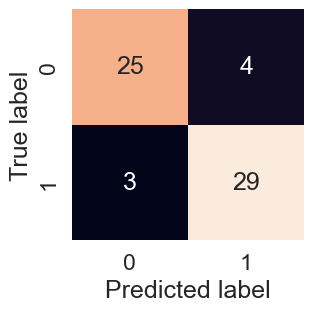

In [125]:
# Import seaborn 
import seaborn as sns 
sns.set(font_scale = 1.5) # increase fontsize 

def plot_conf_mat(y_test,y_preds):
    '''
    Plots a confusion matrix using Seaborn's heatmap().
    '''
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar = False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # tue labels go on the y-axis
plot_conf_mat(y_test,y_preds)

# Evaluating our tuned machine learning classifier, beyound accuracy 

* ROC curve and AUC score
* Confusion matrix 
* Classification report 
* Precision 
* F1 score 

...and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our traine model, first we need to make predictions. 

In [127]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [128]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [129]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

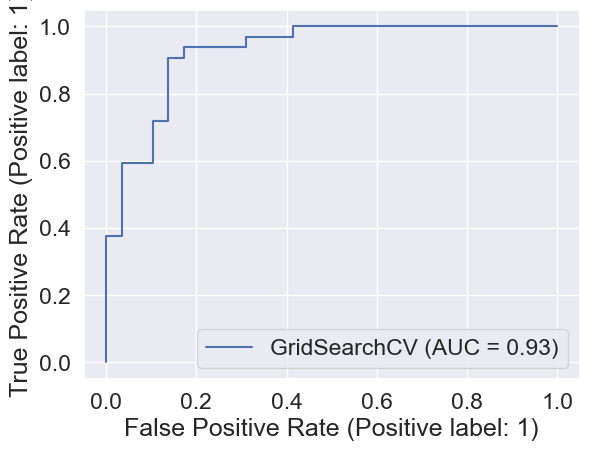

In [133]:
# Plot the ROC curve  and calculate AUC metric

RocCurveDisplay.from_estimator(
   gs_log_reg, X_test, y_test)

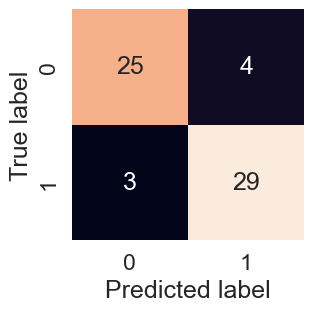

In [134]:
# Confusion matrix 
# Import seaborn 
import seaborn as sns 
sns.set(font_scale = 1.5) # increase fontsize 

def plot_conf_mat(y_test,y_preds):
    '''
    Plots a confusion matrix using Seaborn's heatmap().
    '''
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar = False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # tue labels go on the y-axis
plot_conf_mat(y_test,y_preds)

Now we've got a ROC curve , an AUC metric and a confusion matrix,let's get a classification report as well as cross-validated precision,recall and f1-score

In [136]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Claculate evaluation matrix using cross-validation 
we're going to calculate precision,recall and f1_score of our model using cross-validation and to do so we'll be using `cross_val_score`

In [138]:
# check best hyperparameters 
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [139]:
# Create a new classifier with best parameters 
clf = LogisticRegression(C=0.20433597178569418,solver='liblinear')

In [158]:
# CrossValidated Accuracy 
cv_acc = cross_val_score(clf,X,y,cv=5,scoring='accuracy')
cv_acc = np.mean(cv_acc) 
cv_acc

0.8446994535519124

In [159]:
# CrossValidated Recall
cv_rec = cross_val_score(clf,X,y,cv=5,scoring='recall')
cv_rec = np.mean(cv_rec) 
cv_rec

0.9212121212121213

In [160]:
# CrossValidated Precision
cv_prec = cross_val_score(clf,X,y,cv=5,scoring='precision')
cv_prec = np.mean(cv_prec) 
cv_prec

0.8207936507936507

In [161]:
# CrossValidated F1
cv_f1 = cross_val_score(clf,X,y,cv=5,scoring='f1')
cv_f1 = np.mean(cv_f1) 
cv_f1

0.8673007976269721

<Axes: title={'center': 'Cross-Validated Classification metrics'}>

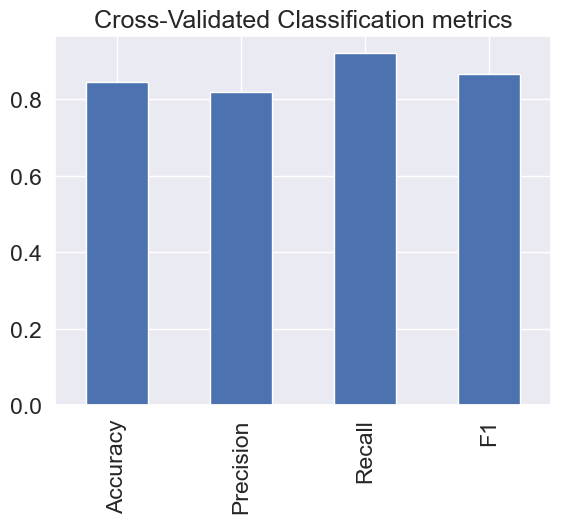

In [162]:
# Visualize our cross_validated merics 
cv_metrics = pd.DataFrame({'Accuracy':cv_acc,
                          'Precision':cv_prec,
                          'Recall':cv_rec,
                          'F1':cv_f1},
                         index=[0])
cv_metrics.T.plot.bar(title='Cross-Validated Classification metrics',
                     legend=False)

# Feature Importance 
feature importance is another way of asking , which features contributed most to the outcomes of the model and how did they contribute?

Finding Feature importance is different for different machine learning model 

Let's find feature importance for our logistic regression.

In [163]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [165]:
# Fit an instance of LogisticRegression 
gs_log_reg.best_params_

clf = LogisticRegression(C=0.20433597178569418,solver='liblinear')
clf.fit(X_train,y_train);


In [166]:
# Check coef_
clf.coef_

array([[ 0.00316728, -0.86044652,  0.6606704 , -0.01156993, -0.00166375,
         0.04386107,  0.31275848,  0.02459362, -0.60413081, -0.56862803,
         0.45051628, -0.63609898, -0.67663373]])

In [167]:
# Match coef's of features to columns 
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672806268220445,
 'sex': -0.8604465226286001,
 'cp': 0.6606703996492814,
 'trestbps': -0.011569930743501303,
 'chol': -0.001663745833540806,
 'fbs': 0.043861067871676124,
 'restecg': 0.3127584791782968,
 'thalach': 0.02459361509185037,
 'exang': -0.6041308102637141,
 'oldpeak': -0.5686280255489925,
 'slope': 0.4505162810238786,
 'ca': -0.6360989756865822,
 'thal': -0.67663372723561}

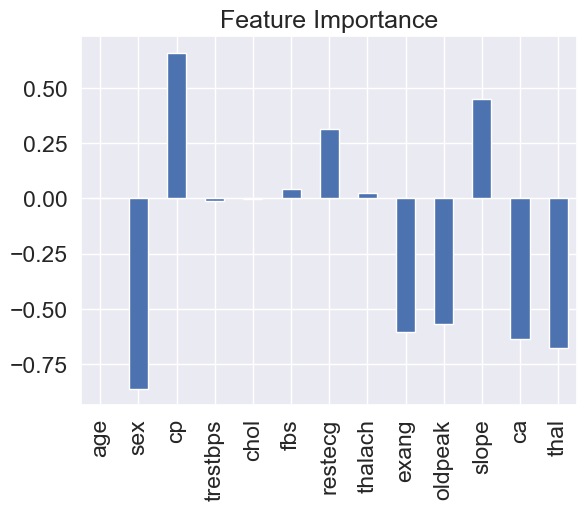

In [170]:
# Visualize Feature Importance 

feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title='Feature Importance',legend=False);


In [174]:
pd.crosstab(df['sex'],df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [173]:
pd.crosstab(df['slope'],df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## Experimentation 

If you haven't hit your evaluation metric yet... ask yourself...

* Could you collect more  data?
* Could you try a better model? Like CatBoost or XgBoost
* Could you improve the current models? (beyound what we've done so far)
* If your model is good enough (you have hit your evaluation metric) How would you export it and share it with others?
